# Following tutorial for NeuroM found at:
https://github.com/BlueBrain/NeuroM/blob/master/ipynb/tutorial.ipynb

In [1]:
!ls ./data

summary.json  THINSTAR.CNG.swc


In [2]:
!morph_check ./data/THINSTAR.CNG.swc

INFO: ========================================
INFO: File: ./data/THINSTAR.CNG.swc
INFO:                      Is single tree PASS
INFO:                     Has soma points PASS
INFO:                  Has sequential ids PASS
INFO:                  Has increasing ids PASS
INFO:                      Has valid soma PASS
INFO:                  Has valid neurites PASS
INFO:                  Has basal dendrite PASS
ERROR:                            Has axon FAIL
ERROR:                 Has apical dendrite FAIL
INFO:     Has all nonzero segment lengths PASS
INFO:     Has all nonzero section lengths PASS
INFO:       Has all nonzero neurite radii PASS
INFO:             Has nonzero soma radius PASS
ERROR:                                 ALL FAIL
INFO: ========================================


In [3]:
%matplotlib inline
# import NeuroM module
import neurom as nm
# import neurom visualization module
from neurom import viewer


In [4]:
# load a neuron from an swc, h5 or NL ascii (Warning: Neurolucida ascii reader is experimental! There are no guarantees regarding correctness of loading output.) file  
neuron = nm.load_neuron('./data/THINSTAR.CNG.swc')

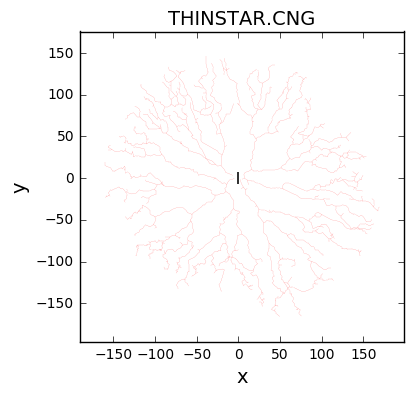

In [9]:
# visualize a neuron in two dimensions
fig, ax = viewer.draw(neuron, mode='2d')

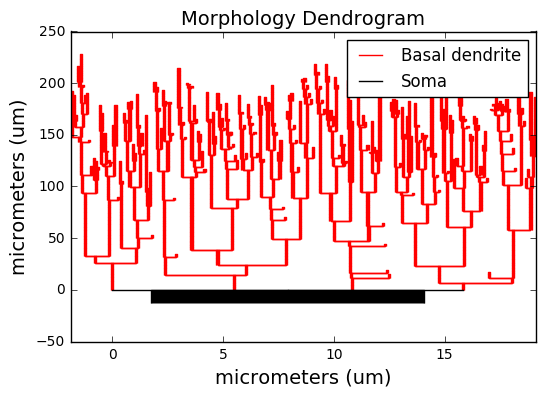

In [10]:
# visualize the dendrogram of a neuron
fig, ax = viewer.draw(neuron, mode='dendrogram')

In [16]:
# Extract the number of all neurites (basal and apical dendrites, and axons)
number_of_neurites = nm.get('number_of_neurites', neuron)

# Extract the number of sections
number_of_sections = nm.get('number_of_sections', neuron)

# Extract soma radius
soma_radius = neuron.soma.radius

# Extract the number of sections per neurite
number_of_sections_per_neurite = nm.get('number_of_sections_per_neurite', neuron)

template = """
Neuron id          : {0} \n\
Number of neurites : {1} \n\
Soma Radius        : {2:.2f} \n\
Number of sections : {4}
"""

# printing
print(template.format(neuron.name, number_of_neurites, soma_radius, number_of_neurites, number_of_sections))

print()
print("Neurite type \t\t\t| Number of sections")

for i, neurite in enumerate(neuron.neurites):
    
    print("{0:31} | {1}".format(str(neurite.type), number_of_sections_per_neurite[i]))


Neuron id          : THINSTAR.CNG 
Number of neurites : [4] 
Soma Radius        : 6.14 
Number of sections : [424]


Neurite type 			| Number of sections
NeuriteType.basal_dendrite      | 75
NeuriteType.basal_dendrite      | 147
NeuriteType.basal_dendrite      | 69
NeuriteType.basal_dendrite      | 133
